## Problem Description

Food security is threatened by a number of factors 

1. Climate change (Tai et al., 2014), 
2. The decline in pollinators (Report of the Plenary of the Intergovernmental Science-PolicyPlatform on Biodiversity Ecosystem and Services on the work of its fourth session, 2016), 
3. Plant diseases (Strange and Scott, 2005), and others. 

Plant diseases normaly have disastrous consequences for smallholder farmers whose livelihoods depend on healthy crops. More than 80 percent of the agricultural production is generated by smallholder farmers (UNEP, 2013), and reports of yield loss of more than 50% due to pests and diseases are common (Harvey et al., 2014). 


## Dataset

https://github.com/spMohanty/PlantVillage-Dataset

The different versions of the dataset are present in the raw directory :

- color : Original RGB images
- grayscale : grayscaled version of the raw images
- segmented : RGB images with just the leaf segmented and color corrected.

We will be using the diseases of Tomoto plants for our case.


### Tomato Diseases and their descriptions

https://www.thespruce.com/tomato-leaf-diseases-1403409

## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

## Download Data

In [2]:
#!pip install --upgrade gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!gdown 1JFZDEqRcReAjJiqCxz-W4707ipDEFe6i -O trainset.zip

Downloading...
From: https://drive.google.com/uc?id=1JFZDEqRcReAjJiqCxz-W4707ipDEFe6i
To: /content/trainset.zip
100% 63.9M/63.9M [00:00<00:00, 213MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vLSeg7Gzl_W9GvwkBa_k8YV70j7XYTw3
To: /content/testset.zip
100% 5.99M/5.99M [00:00<00:00, 156MB/s]


In [2]:
# Uncomment the following lines if you have downloaed older versions of data already
#!rm tomatoes.zip
#!rm -r tomatoes

In [4]:
!ls -al

total 68296
drwxr-xr-x 1 root root     4096 Mar 21 10:54 .
drwxr-xr-x 1 root root     4096 Mar 21 10:51 ..
drwxr-xr-x 4 root root     4096 Mar 17 13:39 .config
drwxr-xr-x 1 root root     4096 Mar 17 13:40 sample_data
-rw-r--r-- 1 root root  5985415 Mar 21 10:54 testset.zip
-rw-r--r-- 1 root root 63929609 Mar 21 10:54 trainset.zip


In [5]:
!unzip -q trainset.zip -d trainset/

In [6]:
!ls -al trainset/

total 12
drwxr-xr-x 3 root root 4096 Mar 21 10:55 .
drwxr-xr-x 1 root root 4096 Mar 21 10:55 ..
drwxrwxr-x 7 root root 4096 Mar 21 09:56 MultiClassDataDemo


## Load data

In [7]:
image_dir = '/content/trainset/MultiClassDataDemo/'

In [8]:
def loadImageFiles(dir):
    files = [(dir + '/'+ f)
             for f in os.listdir(dir)
             if f.endswith('.jpg')]
    return files

In [9]:
def loadImages(files, n = 10):
    images = [cv2.imread(file) for file in files[0:n]]
    return images

In [10]:
healthy_images_dir = image_dir + 'Healthy/'
bacterial_spot_images_dir = image_dir + 'Bacterial_spot/'
healthy_images_files = loadImageFiles(healthy_images_dir)
bacterial_spot_images_files = loadImageFiles(bacterial_spot_images_dir)

In [11]:
# load all the images from name
healthy_images = loadImages(healthy_images_files)
bacterial_spot_images = loadImages(bacterial_spot_images_files)

## Data Pre-processing

### Healthy Leaf

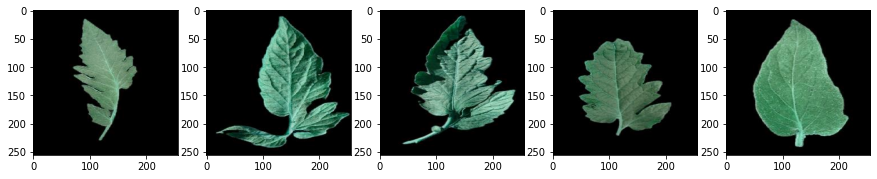

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(5):
    ax[i].imshow(healthy_images[i])

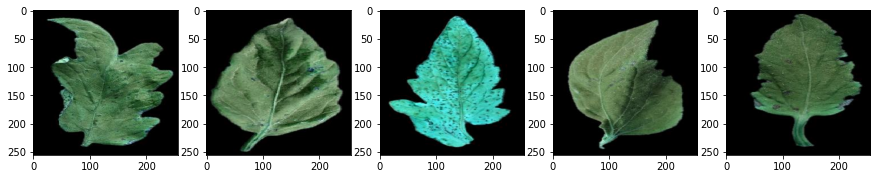

In [13]:
fig, ax = plt.subplots(1, 5, figsize=(15, 8))

for i in range(5):
    ax[i].imshow(bacterial_spot_images[i+5])

## Splitting Train and Test

In [14]:
from keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(image_dir,
                                                    target_size=(256, 256),
                                                    batch_size=64,
                                                    class_mode='categorical')

Found 7579 images belonging to 5 classes.


In [16]:
train_generator.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Healthy': 2,
 'Late_blight': 3,
 'Leaf_Mold': 4}

In [17]:
image_shape = train_generator.image_shape

## Read the first batch

In [18]:
x_batch, y_batch = next(train_generator)

In [19]:
x_batch.shape

(64, 256, 256, 3)

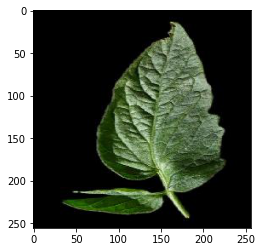

In [20]:
plt.imshow( x_batch[0] );
plt.grid(False)    
plt.show();

## Build the model for Classifying all tomato categories 

In [21]:
from tensorflow import keras

In [22]:
# import necessary building blocks
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, Input, ReLU

### Model 2: Use pre-built networks via transfer learning

** Architecture **
- Conv -> Maxpool -> Conv-> Maxpool -> Maxpool -> Conv -> Maxpool -> Dense(256) -> Dense(64) -> Dense(10) -> Softmax

** Optimizer **

- Adam
- Batch size = 128
- Epoch = 20

In [25]:
#tf.keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(ReLU())
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, padding='same', input_shape=image_shape))
model.add(ReLU())
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 strides=1, 
                 padding='same', 
                 input_shape=image_shape))
model.add(ReLU())
                            
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Flatten())
    
model.add(Dense(256))
model.add(ReLU())

model.add(Dense(64))
model.add(ReLU())

model.add(Dense(5))
model.add(Activation('softmax'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 re_lu (ReLU)                (None, 256, 256, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        4640      
                                                                 
 re_lu_1 (ReLU)              (None, 85, 85, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                    

In [28]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

EPOCHS = 10

history = model.fit_generator(train_generator,
                              steps_per_epoch=30,
                              epochs=EPOCHS,
                              validation_data=train_generator,
                              validation_steps=5)

<ipython-input-28-deb00723b64d>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
30/30 [==============================] - 9s 256ms/step - loss: 0.9122 - accuracy: 0.6654 - val_loss: 1.0020 - val_accuracy: 0.6031
Epoch 2/10
30/30 [==============================] - 7s 247ms/step - loss: 0.8099 - accuracy: 0.6911 - val_loss: 0.6590 - val_accuracy: 0.7688
Epoch 3/10
30/30 [==============================] - 7s 225ms/step - loss: 0.7245 - accuracy: 0.7307 - val_loss: 0.7244 - val_accuracy: 0.7406
Epoch 4/10
30/30 [==============================] - 8s 262ms/step - loss: 0.5890 - accuracy: 0.7771 - val_loss: 0.5552 - val_accuracy: 0.7906
Epoch 5/10
30/30 [==============================] - 7s 249ms/step - loss: 0.4848 - accuracy: 0.8306 - val_loss: 0.3980 - val_accuracy: 0.8500
Epoch 6/10
30/30 [==============================] - 7s 243ms/step - loss: 0.3772 - accuracy: 0.8656 - val_loss: 0.2770 - val_accuracy: 0.9156
Epoch 7/10
30/30 [==============================] - 7s 229ms/step - loss: 0.3612 - accuracy: 0.8745 - val_loss: 0.3804 - val_accuracy: 0.8438
Epoch 

### Function: train and test accuracy plot

In [35]:
def plot_train_val_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Function: train and test loss plot

In [36]:
def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

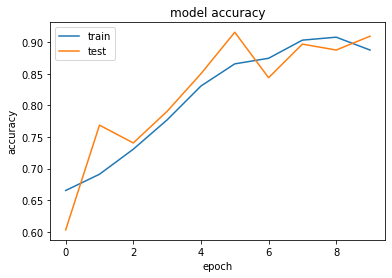

In [41]:
plot_train_val_accuracy(history.history)

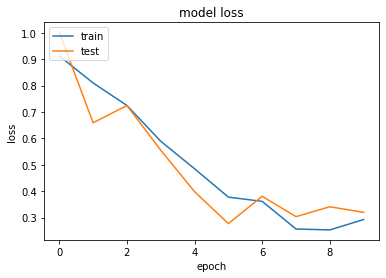

In [40]:
plot_train_val_loss(history.history)

### Making Model Predictions

In [43]:
# Uncomment if you have already downloaded testset before
#!rm testset.zip
#!rm -r testset

In [44]:
!gdown 1T1r6If53dbS98Y5q1I2M7Q4kdVruTCcP -O testset.zip

Downloading...
From: https://drive.google.com/uc?id=1T1r6If53dbS98Y5q1I2M7Q4kdVruTCcP
To: /content/testset.zip
100% 5.65M/5.65M [00:00<00:00, 117MB/s]


In [45]:
!unzip -q testset.zip -d testset/

In [75]:
from keras.utils import image_dataset_from_directory

In [111]:
test_dir = '/content/testset/testset'

testdata = image_dataset_from_directory(test_dir,
                                        shuffle = True,
                                        image_size=(256, 256),
                                        labels="inferred",
                                        batch_size = 512,
                                        label_mode="int")

Found 692 files belonging to 5 classes.


In [112]:
testdata.class_names

['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold']

In [121]:
for image_batch, labels_batch in testdata:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(512, 256, 256, 3)
(512,)


In [124]:
image_batch = image_batch/255.0

In [125]:
y_prob_test = model.predict(image_batch)

16/16 [==============================] - 0s 21ms/step


In [126]:
y_prob_test[0:10]

array([[4.17868001e-03, 1.21935224e-03, 1.89735589e-03, 9.74105060e-01,
        1.85995698e-02],
       [1.69975907e-02, 8.81701231e-01, 1.20365970e-04, 1.01119645e-01,
        6.12132499e-05],
       [4.69620463e-05, 1.69335194e-02, 8.74709804e-04, 1.59658547e-02,
        9.66178954e-01],
       [2.66629009e-04, 1.21740932e-02, 4.70556406e-05, 6.26816461e-03,
        9.81244028e-01],
       [3.82313359e-04, 4.19706553e-01, 6.97578362e-04, 5.71265161e-01,
        7.94842001e-03],
       [7.59625400e-05, 5.87949991e-01, 6.97438559e-03, 1.88163981e-01,
        2.16835648e-01],
       [4.45040874e-03, 3.45691115e-01, 1.67050667e-03, 6.46656215e-01,
        1.53169362e-03],
       [4.28480009e-04, 8.92846808e-02, 8.94949496e-01, 7.83074647e-03,
        7.50656938e-03],
       [9.99619126e-01, 3.09570547e-04, 2.46217423e-05, 4.63601136e-05,
        2.77165952e-07],
       [1.90580704e-06, 1.15926180e-03, 1.79957606e-05, 2.91450322e-02,
        9.69675779e-01]], dtype=float32)

In [138]:
y_test = labels_batch.numpy()

In [139]:
y_pred = np.argmax(y_prob_test, axis=1)

In [140]:
np_label_names = list(train_generator.class_indices.keys())

In [141]:
np_label_names

['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold']

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [145]:
cm = confusion_matrix(y_test, y_pred)

<Figure size 864x720 with 0 Axes>

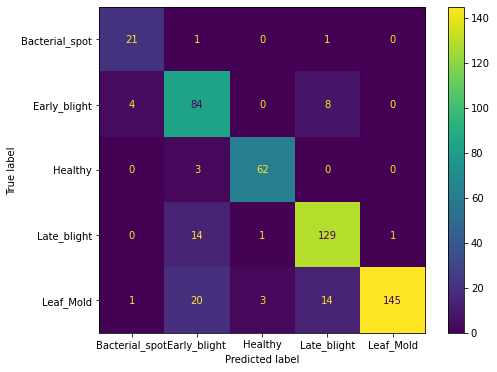

In [153]:
plt.figure(figsize=(12, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=np_label_names)
fig, ax = plt.subplots(figsize=(8,6))
# Deactivate default colorbar
disp.plot(ax=ax, colorbar=True);